# Training model

This notebook illustrates how the ECNN is trained. 

Firstly, the created data-set is made. (see the prepare_cnn.ipynb notebook). Then, a model arcitecture is defined. The models are then trained. Lastly, the model is used on one single image. For testing on a folder, see testing_cnn.ipynb

------------------------
These packages must be installed in colab

In [2]:
#!pip install geopandas
#!pip install rasterio
#!pip install contextily
#!pip install sentinelsat

IT IS IMPORTANT THAT THE VERSION OF TF-NIGHTLY IS CORRECT!

In [2]:
#!pip install 'tf-nightly==2.3.0-dev20200529' --force-reinstall
#!pip install tf-nightly==2.4.0.dev20200719 --force-reinstall

Check that the tensorflow version is developer, i.e. dev.

In [2]:
import tensorflow as tf
print(tf.__version__)
import my_cnn as cnn


2.3.0-dev20200529


Using TensorFlow backend.


Finding the data, and checking the folders

In [5]:
data = '/content/drive/My Drive/syntese/data/cnn/added_training_data'
import os
print(os.listdir(data))
print(os.listdir(data+'/'+os.listdir(data)[0]))

['vv', '79', '46', '13', 'vh']
['no_fire', 'fire']


Making a usable training-set, see the create_dataset.ipynb notebook.

In [6]:
#making training set with a certain spil
s1_vh,s1_vv,s3_13,s3_46,s3_79 = cnn.make_dataset(data_folder=data,split=0.2,verbose=1)

Making training set
Found 22 files belonging to 2 classes.
Using 4 files for validation.
Found 22 files belonging to 2 classes.
Using 18 files for training.
Found 22 files belonging to 2 classes.
Using 4 files for validation.
Found 22 files belonging to 2 classes.
Using 18 files for training.
Found 22 files belonging to 2 classes.
Using 4 files for validation.
Found 22 files belonging to 2 classes.
Using 18 files for training.
Found 22 files belonging to 2 classes.
Using 4 files for validation.
Found 22 files belonging to 2 classes.
Using 18 files for training.
Found 22 files belonging to 2 classes.
Using 4 files for validation.
Found 22 files belonging to 2 classes.
Using 18 files for training.


Making the model arcitectures using the cnn.s1_model and cnn.s3_model functions.

In [4]:
model1 = cnn.s1_model((200,200) + (1,),Name='model1',dropout=0.3,regularisation=0.05,filter_size=15,stride=15)
model2 =  cnn.s1_model((200,200) + (1,),Name='model2',dropout=0.3,regularisation=0.05,filter_size=15,stride=15)
model3 = cnn.s3_model((200,200) + (3,),Name='model3',dropout=0.3,regularisation=0.03,filter_size=12,stride=12)
model4 = cnn.s3_model((200,200) + (3,),Name='model4',dropout=0.3,regularisation=0.01,filter_size=12,stride=12)
model5 = cnn.s3_model((200,200) + (3,),Name='model5',dropout=0.3,regularisation=0.01,filter_size=9,stride=9)

Training the models using the cnn.training_cnn funciton.

In [7]:
historie1, conv_pool_cnn_weight_file1 = cnn.training_CNN(model1,s1_vh[1],s1_vh[0],num_epochs= 20, save=True,learning_rate=0.3,verbose=0,batch_size=32);
historie2, conv_pool_cnn_weight_file2 = cnn.training_CNN(model2,s1_vv[1],s1_vv[0],num_epochs= 20, save=True,learning_rate=0.3,verbose=0,batch_size=32);
historie3, conv_pool_cnn_weight_file3 = cnn.training_CNN(model3,s3_13[1],s3_13[0],num_epochs= 20, save=True,learning_rate=0.05,verbose=0,batch_size=32);
historie4, conv_pool_cnn_weight_file4 = cnn.training_CNN(model4,s3_46[1],s3_46[0],num_epochs= 20, save=True,learning_rate=0.05,verbose=0,batch_size=32);
historie5, conv_pool_cnn_weight_file5 = cnn.training_CNN(model5,s3_79[1],s3_79[0], num_epochs= 20,save=True,learning_rate=0.05,verbose=0,batch_size=32);

Instructions for updating:
use `tf.profiler.experimental.stop` instead.
Model is saved.
Model is saved.
Model is saved.
Model is saved.
Model is saved.


The trained models can now be used to detect fires in images. Here, one image is checked for fires using the cnn.prediction_image() function. For informaiton on how to do it on  a folder, see the testing_cnn.ipynb notebook.

In [13]:
import os
path  = os.getcwd()
mask2, extent2 = cnn.prediction_image(folder_img='/content/drive/My Drive/syntese/data/cnn/images_testing/image_pair_3',folder_models=path+'/models',verbose=1)


Fire Detection maps are being calculated:



/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/tensor_util.py:528: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  tensor_proto.tensor_content = nparray.tostring()



there are: 2  . tif  files in folder
--------------------------
Sentinel-1 image is loading

1 image is being loaded
image 1
There are 2 bands

 Making predictions for model 1


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/tensor_util.py:528: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  tensor_proto.tensor_content = nparray.tostring()



 Making predictions for model 2

 Making predictions for model 3

 Making predictions for model 4

 Making predictions for model 5

 Making predictions for the ECNN
(get_predictions): A fire has been located
--- 281.0428946018219 seconds spent ---


Illustrating prediciton. Note this training was not optimised, but made fast for illustrative purposes. The reader is suggested to run it themselves.

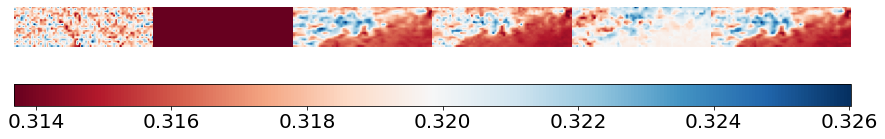

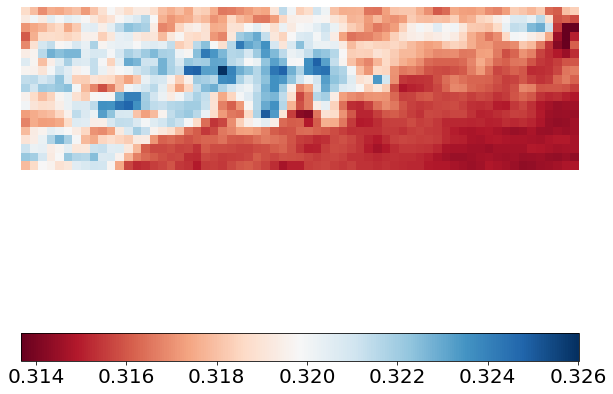

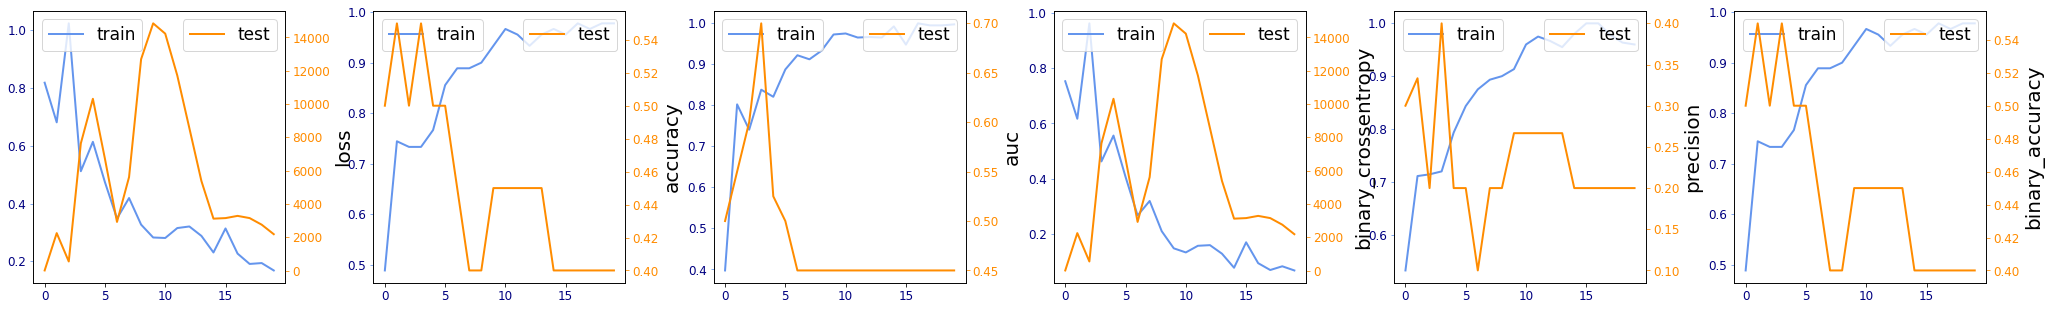

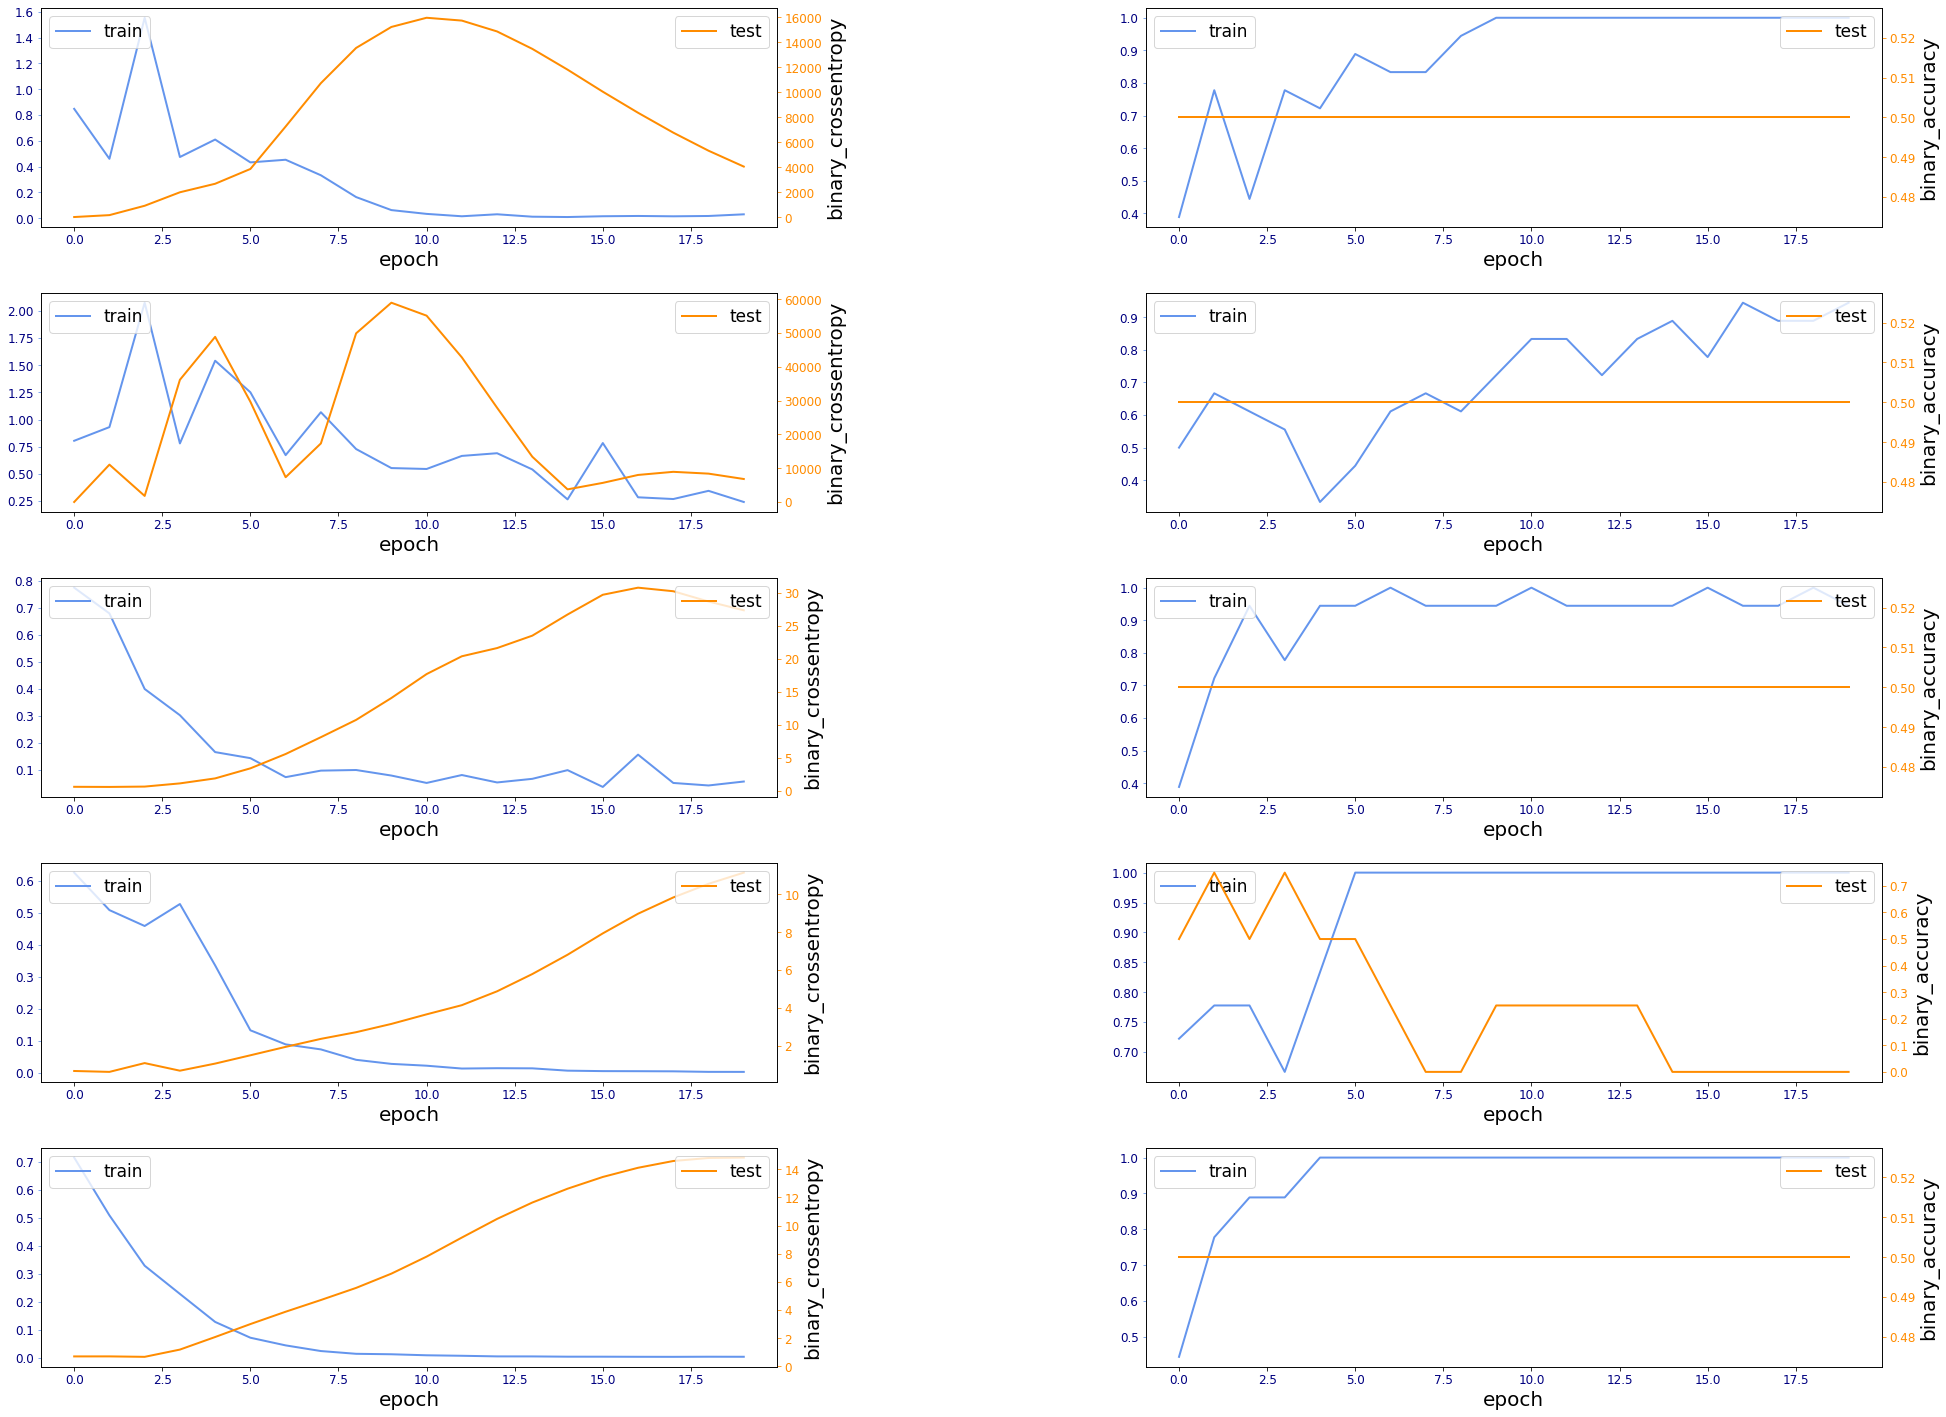

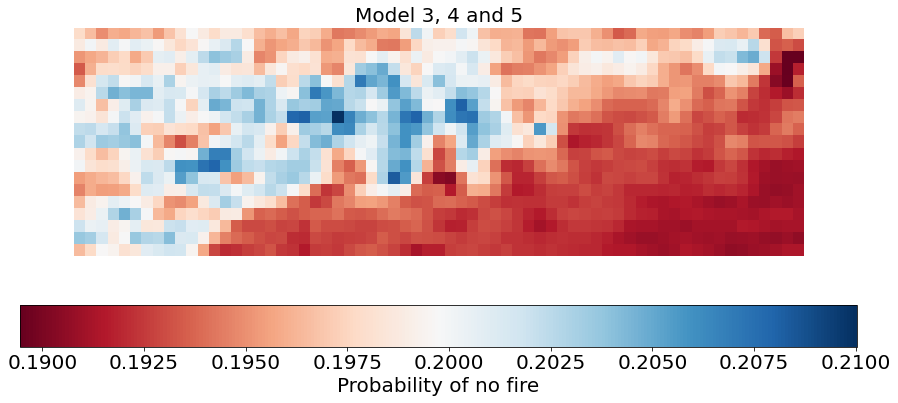

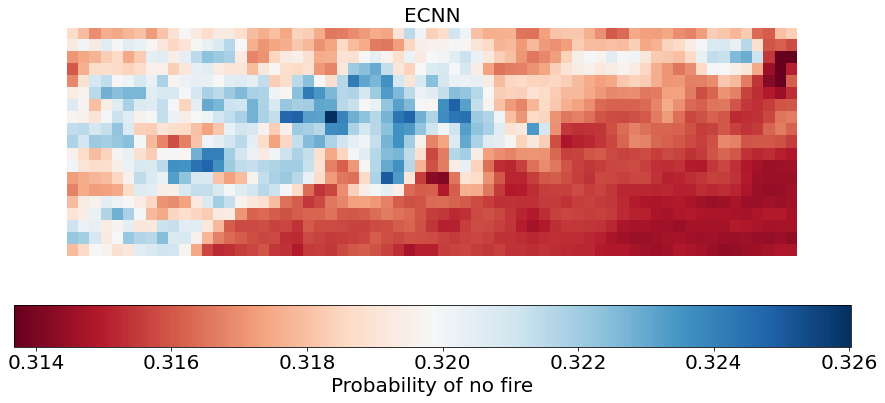

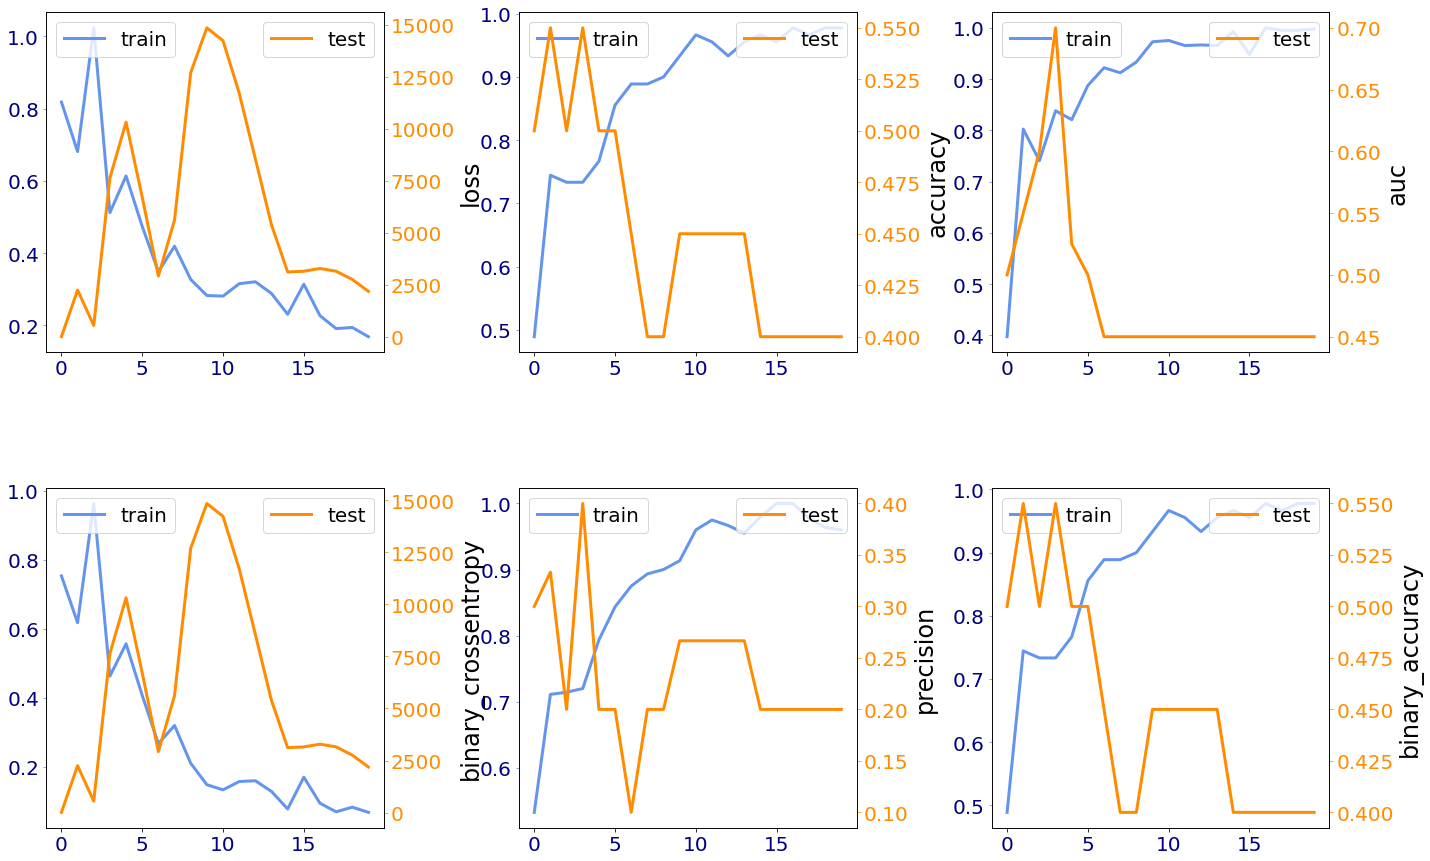

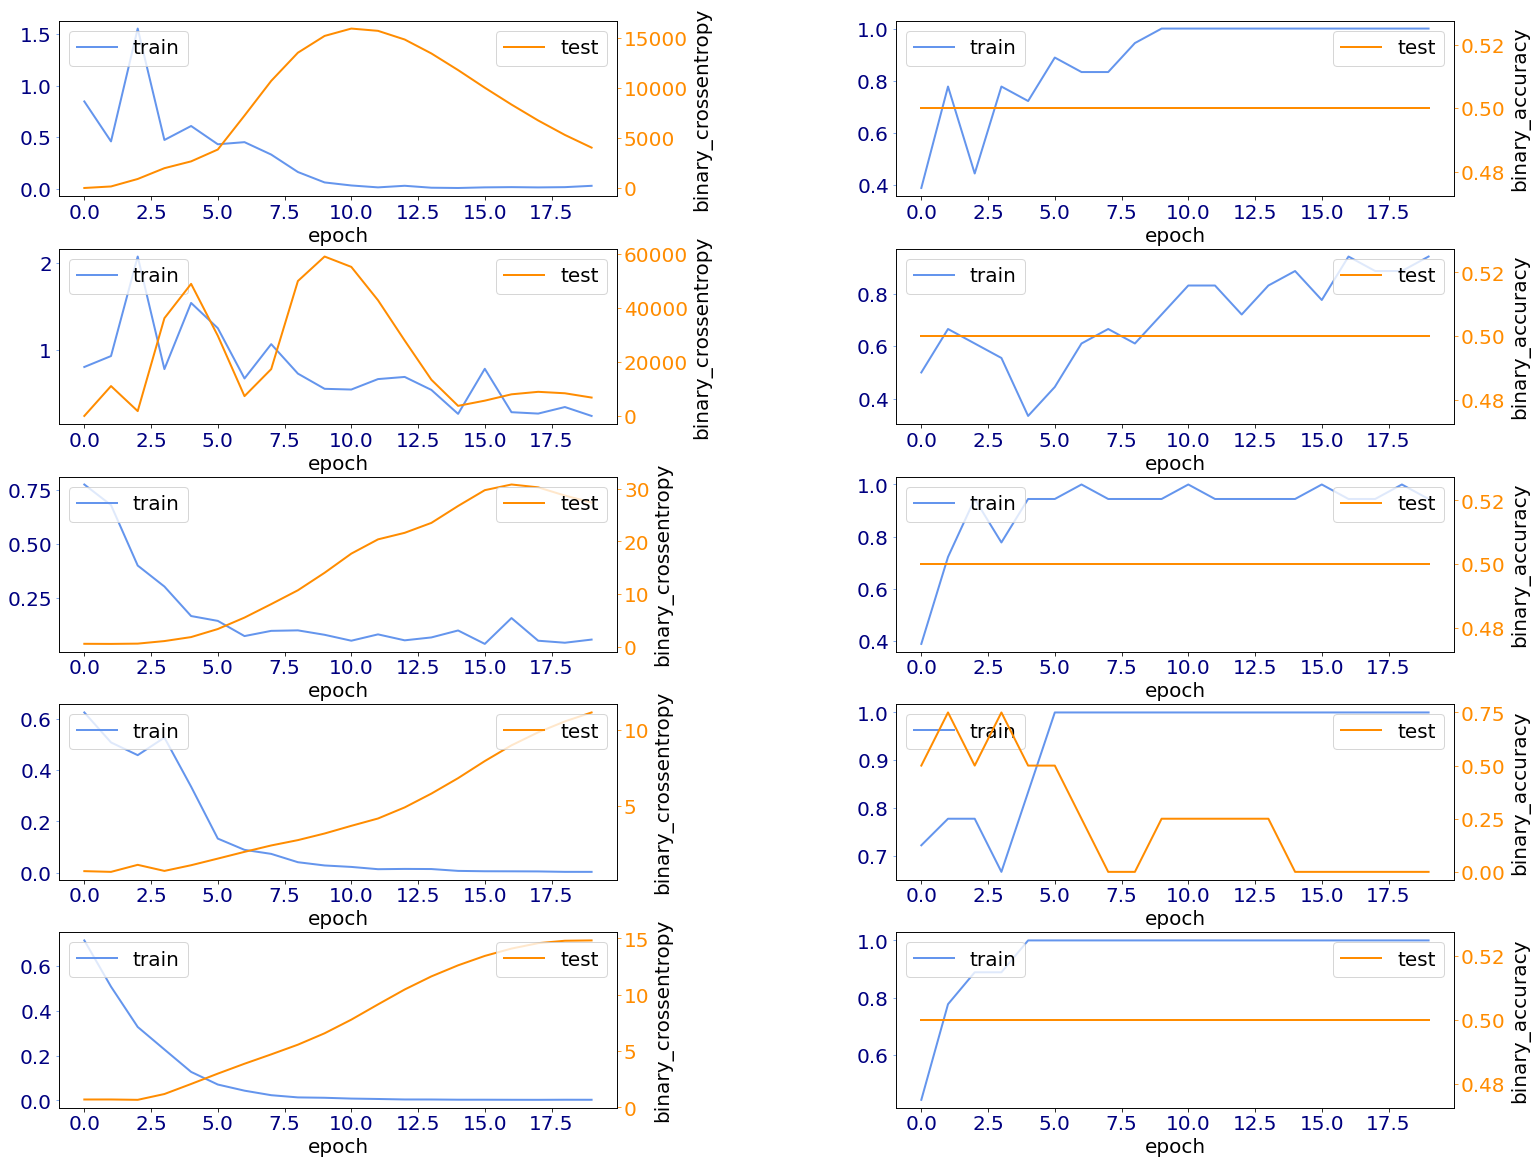

In [14]:
mask_plot = mask2
extent_plot = extent2
from matplotlib import pyplot as plt
import numpy as np
fig2, axs2 = plt.subplots(1,6, figsize=(15, 6), facecolor='w', edgecolor='k')
plt.subplots_adjust(hspace = .5, wspace=.002)
axs2 = axs2.ravel()
for i in range(len(mask_plot)):
    im = axs2[i].imshow(mask_plot[i][:,:,1],cmap='RdBu')
    axs2[i].set_aspect("equal")
    axs2[i].axis('off')

p0 = axs2[0].get_position().get_points().flatten()
p5 = axs2[5].get_position().get_points().flatten()

ax_cbar = fig2.add_axes([p0[0], 0.32, p5[2]-p0[0], 0.05])
cbar = plt.colorbar(im, cax=ax_cbar, orientation='horizontal')
cbar.ax.tick_params(labelsize=20) 
plt.show()



fig = plt.figure(figsize=(10,20))
im2 = plt.imshow(mask_plot[5][:,:,1],cmap='RdBu')
#plt.axis('off')
plt.ylabel('Latitude [Deg]', fontsize=20)
plt.xlabel('Longitude [Deg]', fontsize=20)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
cbar = plt.colorbar(im2, orientation='horizontal')
cbar.ax.tick_params(labelsize=20) 
plt.axis('off')
plt.show()


lenght = len((np.array(historie1.history[list(historie1.history.keys())[0]])))


fig, axs = plt.subplots(1,6, figsize=(35,5), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0, wspace=0.35)
axs = axs.ravel()
for i in range(int(len(list(historie1.history.keys()))/2)):
  if list(historie1.history.keys())[i] != 'val_loss' or  list(historie1.history.keys())[i]!='val_accuracy':
    # summarize history for accuracy
    plot_1 = np.mean([np.array(historie1.history[list(historie1.history.keys())[i]])[0:lenght],np.array(historie2.history[list(historie2.history.keys())[i]])[0:lenght],np.array(historie3.history[list(historie3.history.keys())[i]])[0:lenght],np.array(historie4.history[list(historie4.history.keys())[i]])[0:lenght],np.array(historie5.history[list(historie5.history.keys())[i]])[0:lenght]],axis=0)
    plot_2 = np.mean([np.array(historie1.history['val_'+list(historie1.history.keys())[i]])[0:lenght],np.array(historie2.history['val_'+list(historie2.history.keys())[i]])[0:lenght],np.array(historie3.history['val_'+list(historie3.history.keys())[i]])[0:lenght],np.array(historie4.history['val_'+list(historie4.history.keys())[i]])[0:lenght],np.array(historie5.history['val_'+list(historie5.history.keys())[i]])[0:lenght]],axis=0)
    axs[i].plot(plot_1,color='cornflowerblue', linewidth=2)
    axs[i].tick_params(axis='y',color='cornflowerblue')
    ax2 = axs[i].twinx()  # instantiate a second axes that shares the same x-axis
    ax2.plot(plot_2,color='darkorange', linewidth=2)
    ax2.tick_params(axis='y',color='darkorange')
    plt.ylabel(list(historie1.history.keys())[i], fontsize=20)
    plt.xlabel('epoch', fontsize=20)
    axs[i].legend(['train'],fontsize=17, loc='upper left')
    ax2.legend(['test'],fontsize=17, loc='upper right')
    axs[i].tick_params(labelcolor='navy', labelsize='large')
    ax2.tick_params(labelcolor='darkorange', labelsize='large')
plt.show()



fig, axs = plt.subplots(5,2, figsize=(33,25), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.3, wspace=0.5)
axs = axs.ravel()

h =0
for hist in [historie1,historie2,historie3,historie4,historie5]:
  for i in range(int(len(list(historie2.history.keys()))/2)):
    if list(hist.history.keys())[i] != 'val_loss' or  list(hist.history.keys())[i]!='val_accuracy':
      if list(hist.history.keys())[i] == 'binary_crossentropy' or list(hist.history.keys())[i] == 'binary_accuracy':
      # summarize history for accuracy
        plot_1 = hist.history[list(hist.history.keys())[i]]
        plot_2 = hist.history['val_'+list(hist.history.keys())[i]]
        axs[h].plot(plot_1,color='cornflowerblue', linewidth=2)
        axs[h].tick_params(axis='y',color='cornflowerblue')
        axs[h].set_xlabel('epoch', fontsize=20)
        ax2 = axs[h].twinx() 
        ax2.plot(plot_2,color='darkorange', linewidth=2)
        ax2.tick_params(axis='y',color='darkorange')
        plt.ylabel(list(hist.history.keys())[i], fontsize=20)
        #plt.xlabel('epoch', fontsize=20)
        axs[h].legend(['train'],fontsize=17, loc='upper left')
        ax2.legend(['test'],fontsize=17, loc='upper right')
        #ax2.set_xlabel('epoch')
        axs[h].tick_params(labelcolor='navy', labelsize='large')
        ax2.tick_params(labelcolor='darkorange', labelsize='large')
        h = h+1
plt.show()


mean3 = np.mean([mask2[2][:,:,1],mask2[3][:,:,1],mask2[4][:,:,1]],axis=0)
fig2, axs2 = plt.subplots(figsize=(15, 6), facecolor='w', edgecolor='k')
im3 = plt.imshow(mean3,cmap='RdBu',extent=extent_plot[0])
plt.title('Model 3, 4 and 5',fontsize=20)
cbar = plt.colorbar(im3, orientation='horizontal')
cbar.set_label('Probability of no fire',fontsize=20)
plt.axis('off')
cbar.ax.tick_params(labelsize=20) 



fig2, axs2 = plt.subplots(figsize=(15, 6), facecolor='w', edgecolor='k')
im4 = plt.imshow(mask2[5][:,:,1],cmap='RdBu',extent=extent_plot[0])
plt.title('ECNN',fontsize=20)
cbar = plt.colorbar(im4, orientation='horizontal')
cbar.set_label('Probability of no fire',fontsize=20)
plt.axis('off')
cbar.ax.tick_params(labelsize=20) 


enght = len((np.array(historie1.history[list(historie1.history.keys())[0]])))


fig, axs = plt.subplots(2,3, figsize=(23,15), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.4, wspace=0.4)
axs = axs.ravel()
for i in range(int(len(list(historie1.history.keys()))/2)):
  if list(historie1.history.keys())[i] != 'val_loss' or  list(historie1.history.keys())[i]!='val_accuracy':
    # summarize history for accuracy
    plot_1 = np.mean([np.array(historie1.history[list(historie1.history.keys())[i]])[0:lenght],np.array(historie2.history[list(historie2.history.keys())[i]])[0:lenght],np.array(historie3.history[list(historie3.history.keys())[i]])[0:lenght],np.array(historie4.history[list(historie4.history.keys())[i]])[0:lenght],np.array(historie5.history[list(historie5.history.keys())[i]])[0:lenght]],axis=0)
    plot_2 = np.mean([np.array(historie1.history['val_'+list(historie1.history.keys())[i]])[0:lenght],np.array(historie2.history['val_'+list(historie2.history.keys())[i]])[0:lenght],np.array(historie3.history['val_'+list(historie3.history.keys())[i]])[0:lenght],np.array(historie4.history['val_'+list(historie4.history.keys())[i]])[0:lenght],np.array(historie5.history['val_'+list(historie5.history.keys())[i]])[0:lenght]],axis=0)
    axs[i].plot(plot_1,color='cornflowerblue', linewidth=3)
    axs[i].tick_params(axis='y',color='cornflowerblue',labelsize=20)
    ax2 = axs[i].twinx()  # instantiate a second axes that shares the same x-axis
    ax2.plot(plot_2,color='darkorange', linewidth=3)
    ax2.tick_params(axis='y',color='darkorange',labelsize=20)
    plt.ylabel(list(historie1.history.keys())[i], fontsize=24)
    plt.xlabel('epoch', fontsize=20)
    axs[i].legend(['train'],fontsize=20, loc='upper left')
    ax2.legend(['test'],fontsize=20, loc='upper right')
    axs[i].tick_params(labelcolor='navy', labelsize=20)
    ax2.tick_params(labelcolor='darkorange', labelsize=20)
plt.show()



fig, axs = plt.subplots(5,2, figsize=(25,20), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.3, wspace=0.5)
axs = axs.ravel()

h =0
for hist in [historie1,historie2,historie3,historie4,historie5]:
  for i in range(int(len(list(historie2.history.keys()))/2)):
    if list(hist.history.keys())[i] != 'val_loss' or  list(hist.history.keys())[i]!='val_accuracy':
      if list(hist.history.keys())[i] == 'binary_crossentropy' or list(hist.history.keys())[i] == 'binary_accuracy':
      # summarize history for accuracy
        plot_1 = hist.history[list(hist.history.keys())[i]]
        plot_2 = hist.history['val_'+list(hist.history.keys())[i]]
        axs[h].plot(plot_1,color='cornflowerblue', linewidth=2)
        axs[h].tick_params(axis='y',color='cornflowerblue',labelsize=20)
        axs[h].set_xlabel('epoch', fontsize=20)
        ax2 = axs[h].twinx() 
        ax2.plot(plot_2,color='darkorange', linewidth=2)
        ax2.tick_params(axis='y',color='darkorange',labelsize=20)
        plt.ylabel(list(hist.history.keys())[i], fontsize=20)
        #plt.xlabel('epoch', fontsize=20)
        axs[h].legend(['train'],fontsize=20, loc='upper left')
        ax2.legend(['test'],fontsize=20, loc='upper right')
        #ax2.set_xlabel('epoch')
        axs[h].tick_params(labelcolor='navy', labelsize=20)
        ax2.tick_params(labelcolor='darkorange', labelsize=20)
        h = h+1
plt.show()
